<a href="https://colab.research.google.com/github/dev-2k/ml-number-recognizer/blob/main/Copy_of_num_reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.5.0


In [ ]:
import tensorflow.keras as keras

In [ ]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

In [ ]:
model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

In [ ]:
model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  

In [ ]:
model.fit(x_train, y_train, epochs=50) 

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2687 - accuracy: 0.9213
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1109 - accuracy: 0.9656
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0738 - accuracy: 0.9770
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0551 - accuracy: 0.9821
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0414 - accuracy: 0.9865
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0326 - accuracy: 0.9892
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0257 - accuracy: 0.9916
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0217 - accuracy: 0.9925
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0185 - accuracy: 0.9937
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.016

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.2022 - accuracy: 0.9767
0.20219473540782928
0.9767000079154968


In [ ]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [ ]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [ ]:
predictions = new_model.predict(x_test)

In [ ]:
print(predictions)


[[1.7234929e-31 7.1677025e-23 5.0917132e-20 ... 1.0000000e+00
  9.9644562e-34 2.8946271e-27]
 [0.0000000e+00 2.6701067e-19 1.0000000e+00 ... 0.0000000e+00
  5.7126970e-37 0.0000000e+00]
 [2.2448416e-24 1.0000000e+00 1.7444298e-21 ... 4.0277331e-15
  1.9533319e-15 2.6015710e-23]
 ...
 [0.0000000e+00 2.7179999e-24 6.8300226e-33 ... 1.9506557e-18
  8.3935223e-23 1.8176640e-17]
 [3.2368118e-27 5.4228799e-32 8.8249016e-31 ... 1.6129646e-21
  1.3599300e-13 6.0982973e-31]
 [2.1532764e-30 2.4267742e-29 1.7032034e-26 ... 0.0000000e+00
  7.9898649e-24 0.0000000e+00]]


In [ ]:
import numpy as np
print(np.argmax(predictions[0]))


7


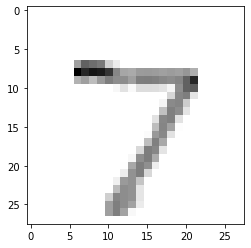

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

2


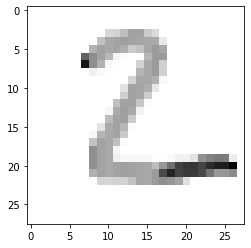

In [ ]:
print(np.argmax(predictions[1]))
plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show()

In [ ]:
!ls {/sample_data}

ls: cannot access '{/sample_data}': No such file or directory
